# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
#Imports based off of Prof's demo
 # Scraping
from splinter import Browser
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

# requests
import requests
import time

# parsing
from bs4 import BeautifulSoup

# data science
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup object -- scrapes from website
html = browser.html # Saves browser html
soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data
table = soup.find("table", {"class":"table"})
rows = soup.find_all('tr', class_="data-row")

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
row_list = []

# Loop through the scraped data to create a list of rows
for row in rows:
    td = row.find_all('td') #td is each data piece(ie id, sol, ls, etc.) on the table in the webpage
    row = [col.text for col in td]
    row_list.append(row)

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df0 = pd.read_html(str(table))
df = df0[0]

df.info()

C:\Users\Noahs\AppData\Local\Temp\ipykernel_52172\3431825378.py:2: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df0 = pd.read_html(str(table))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1867 non-null   int64  
 1   terrestrial_date  1867 non-null   object 
 2   sol               1867 non-null   int64  
 3   ls                1867 non-null   int64  
 4   month             1867 non-null   int64  
 5   min_temp          1867 non-null   float64
 6   pressure          1867 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 102.2+ KB


In [8]:
# Confirm DataFrame was created successfully
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [10]:
df.info

<bound method DataFrame.info of         id terrestrial_date   sol   ls  month  min_temp  pressure
0        2       2012-08-16    10  155      6     -75.0     739.0
1       13       2012-08-17    11  156      6     -76.0     740.0
2       24       2012-08-18    12  156      6     -76.0     741.0
3       35       2012-08-19    13  157      6     -74.0     732.0
4       46       2012-08-20    14  157      6     -74.0     740.0
...    ...              ...   ...  ...    ...       ...       ...
1862  1889       2018-02-23  1973  133      5     -78.0     730.0
1863  1892       2018-02-24  1974  134      5     -77.0     729.0
1864  1894       2018-02-25  1975  134      5     -76.0     729.0
1865  1893       2018-02-26  1976  135      5     -77.0     728.0
1866  1895       2018-02-27  1977  135      5     -77.0     727.0

[1867 rows x 7 columns]>

In [11]:
# Change data types for data analysis
df.terrestrial_date = pd.to_datetime(df.terrestrial_date)

In [12]:
# Confirm type changes were successful by examining data types again
df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [13]:
# 1. How many months are there on Mars?
df.month.nunique()

12

In [14]:
# 2. How many sols (Martian days) worth of data are there?
df.sol.count()

1867

In [15]:
# 3. What is the average minimum temperature by month?
df.groupby("month").min_temp.mean()

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

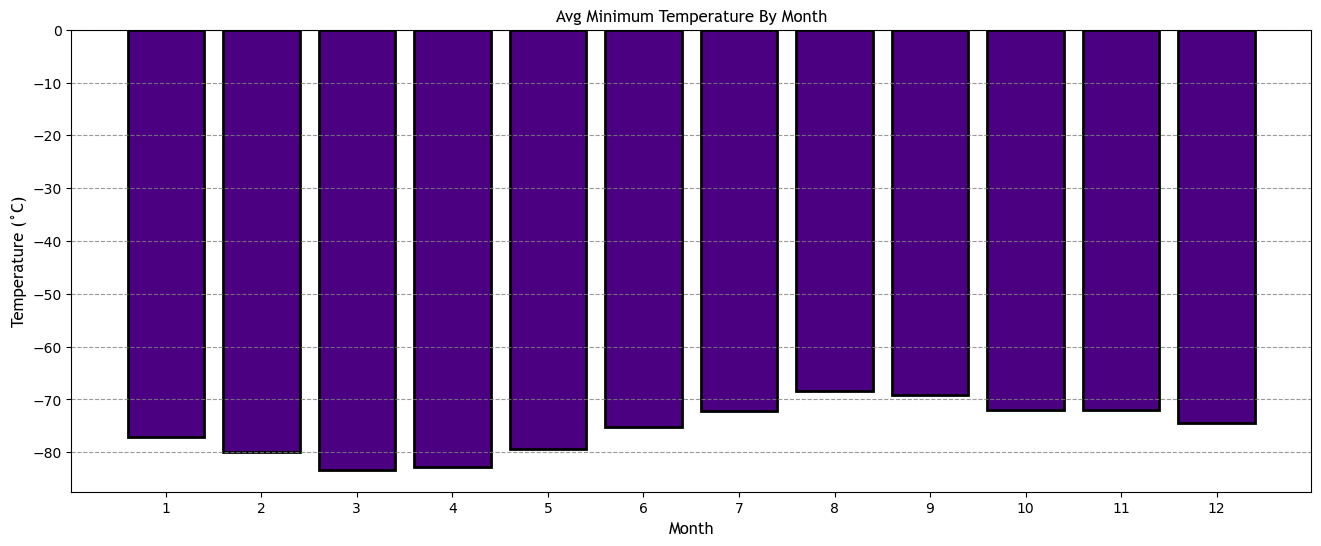

In [16]:
# Plot the average minimum temperature by month

# Create Bar Plot
plot_data = df.groupby("month").min_temp.mean()
plt.figure(figsize=(16,6))
plt.bar(plot_data.index, plot_data.values, edgecolor = "black", color = "indigo", linewidth = 2)

#Customizations
plt.xlabel("Month", fontfamily = "Trebuchet MS", fontsize = 12)
plt.ylabel("Temperature (°C)", fontfamily = "Trebuchet MS", fontsize = 12)
plt.xticks(ticks=plot_data.index)
plt.title("Avg Minimum Temperature By Month", fontfamily = "Trebuchet MS", fontsize = 12)
plt.grid(axis="y", color="grey", alpha = 0.80, linestyle = "--")

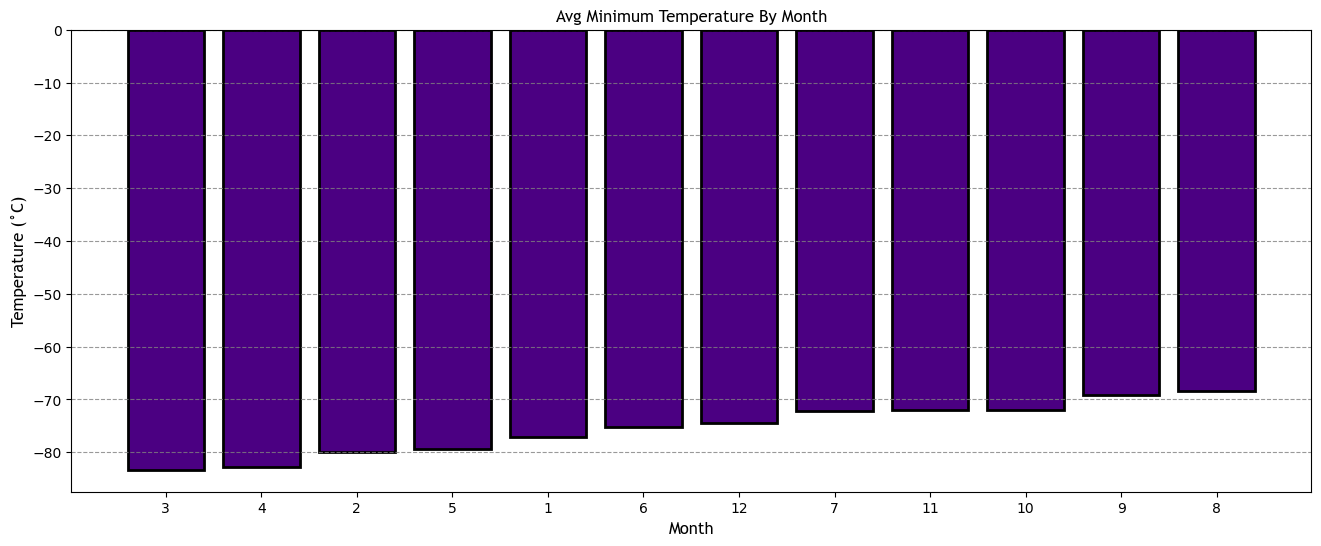

In [17]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph

# Create Bar Plot
plot_data = plot_data.sort_values()


plt.figure(figsize=(16,6))
plt.bar(plot_data.index.astype(str), plot_data.values, edgecolor = "black", color = "indigo", linewidth = 2)

#Customizations
plt.xlabel("Month", fontfamily = "Trebuchet MS", fontsize = 12)
plt.ylabel("Temperature (°C)", fontfamily = "Trebuchet MS", fontsize = 12)
# Fix found using ChatGPT since the first month was not showing using plt.xticks(ticks=range(1,13)) or plt.xticks(ticks=plot_data.index)
plt.xticks(ticks=range(len(plot_data)), labels=plot_data.index)
plt.title("Avg Minimum Temperature By Month", fontfamily = "Trebuchet MS", fontsize = 12)
plt.grid(axis="y", color="grey", alpha = 0.80, linestyle = "--")

In [18]:
# 4. What is the average pressure by month?
df.groupby("month").pressure.mean()


month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

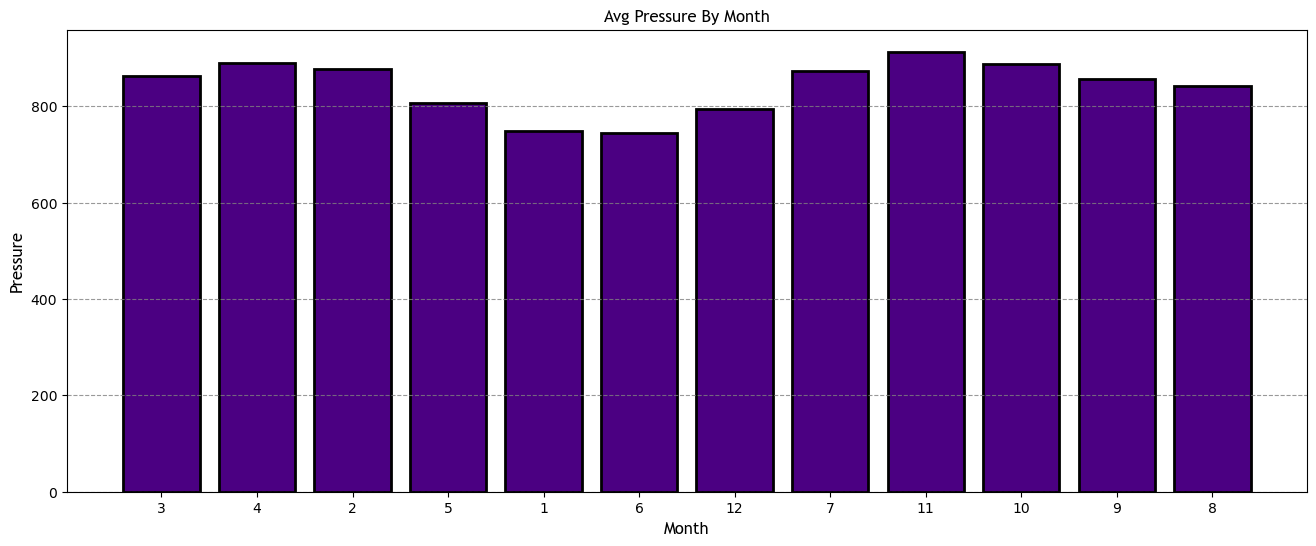

In [19]:
# Plot the average pressure by month

# Create Bar Plot
plot_data1 = df.groupby("month").pressure.mean()


plt.figure(figsize=(16,6))
plt.bar(plot_data1.index.astype(str), plot_data1.values, edgecolor = "black", color = "indigo", linewidth = 2)

#Customizations
plt.xlabel("Month", fontfamily = "Trebuchet MS", fontsize = 12)
plt.ylabel("Pressure", fontfamily = "Trebuchet MS", fontsize = 12)
plt.xticks(ticks=range(len(plot_data)), labels=plot_data.index)
plt.title("Avg Pressure By Month", fontfamily = "Trebuchet MS", fontsize = 12)
plt.grid(axis="y", color="grey", alpha = 0.80, linestyle = "--")

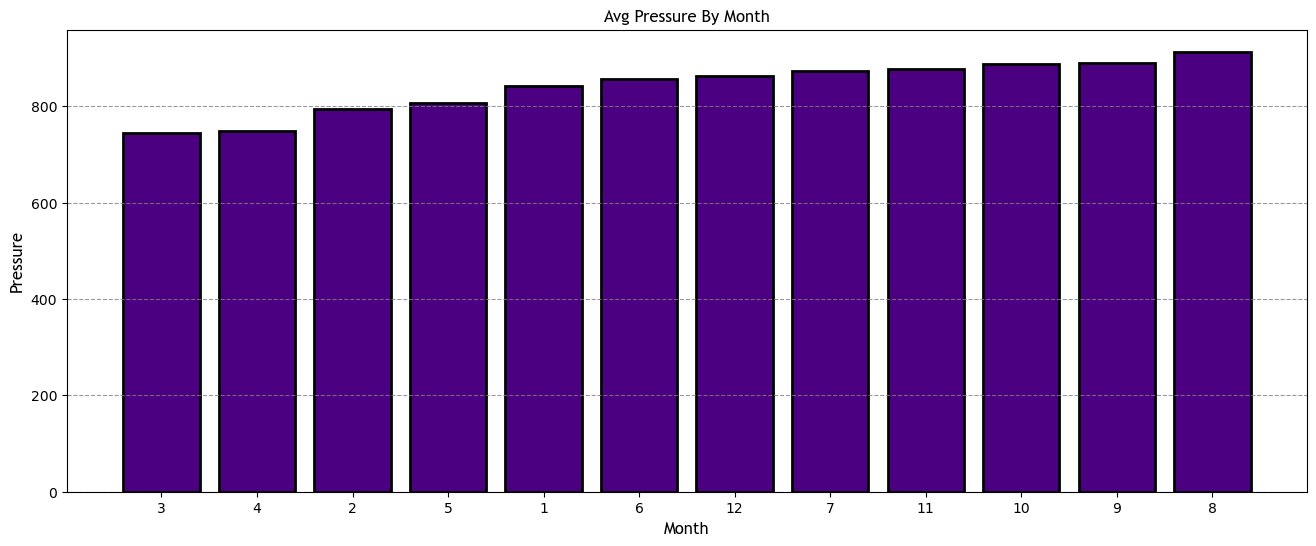

In [20]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
# Create Bar Plot
plot_data1 = plot_data1.sort_values()


plt.figure(figsize=(16,6))
plt.bar(plot_data1.index.astype(str), plot_data1.values, edgecolor = "black", color = "indigo", linewidth = 2)

#Customizations
plt.xlabel("Month", fontfamily = "Trebuchet MS", fontsize = 12)
plt.ylabel("Pressure", fontfamily = "Trebuchet MS", fontsize = 12)
plt.xticks(ticks=range(len(plot_data)), labels=plot_data.index)
plt.title("Avg Pressure By Month", fontfamily = "Trebuchet MS", fontsize = 12)
plt.grid(axis="y", color="grey", alpha = 0.80, linestyle = "--")

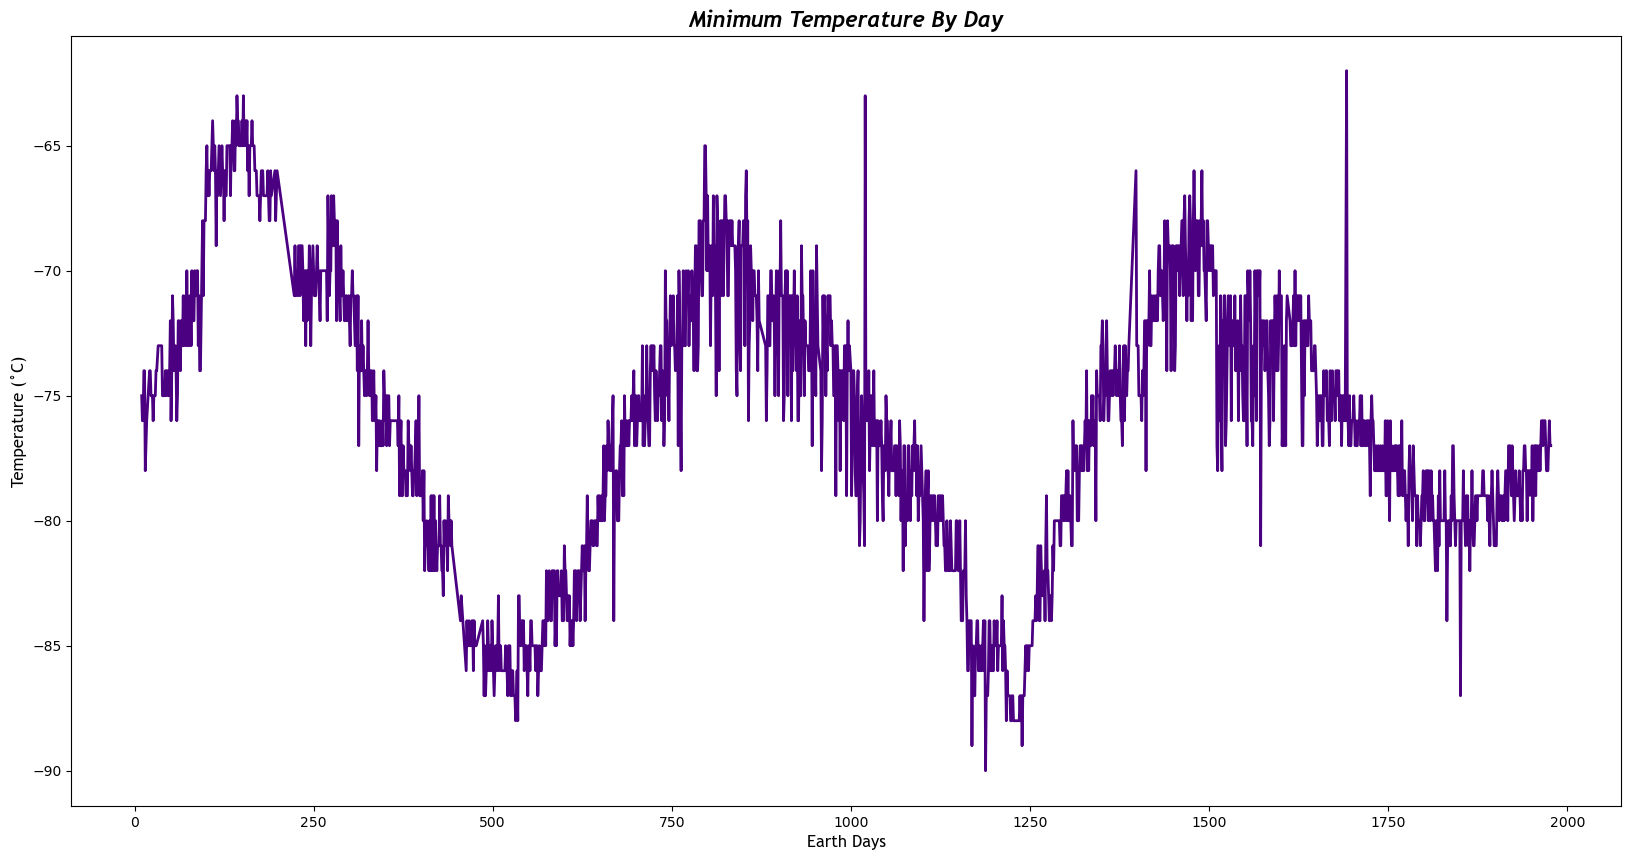

In [21]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.

# Change Canvas Size
plt.figure(figsize=(20, 10))

# Create a basic plot
plt.plot(df.sol, df.min_temp, color="Indigo", linewidth=2, markersize=12)

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Earth Days", fontfamily="Trebuchet MS", fontsize=12)
plt.ylabel("Temperature (°C)", fontfamily="Trebuchet MS", fontsize=12)
plt.title("Minimum Temperature By Day", fontweight="bold", fontsize=16, fontfamily="Trebuchet MS", fontstyle="italic")



# Show/Save the Graph
plt.show()

#### Minimum Temperature

The average minimum pressure is far below Earth on every month. Unexpectedly the third and fourth months are the coldest.

#### Atmospheric Pressure

Pressure is lowest in the third month and highest in the eight month. If this is in millibars, then it is about 20% less pressure than the average on Earth at sea level.

#### Year Length

Year lenght on Mars seem to be far greater than on Earth. Glace value of the crests and troughs shows about a 650 day difference for a full cycle back to the temperature value.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [24]:
# Write the data to a CSV
df.to_csv('mars_table.csv', index=False)

In [23]:
browser.quit()